# 회귀트리
- 결정 트리와 같이 트리 기반으로 하는 회귀 방식
- 트리를 기반으로 한 Random Forest와 LGBM 등의 모델도 회귀가 가능하다

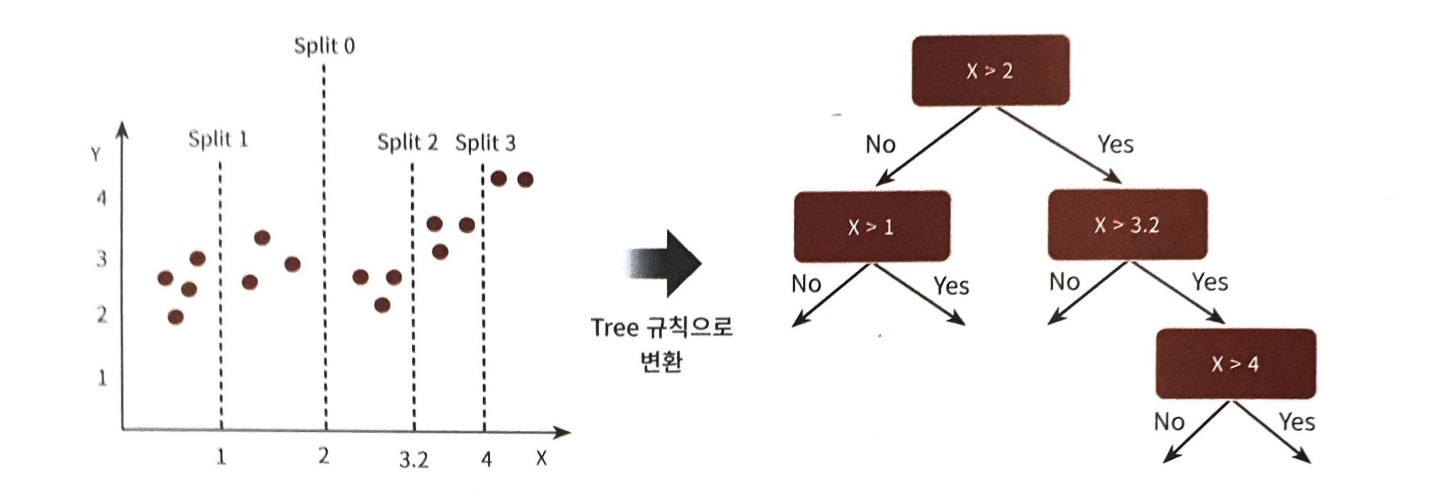

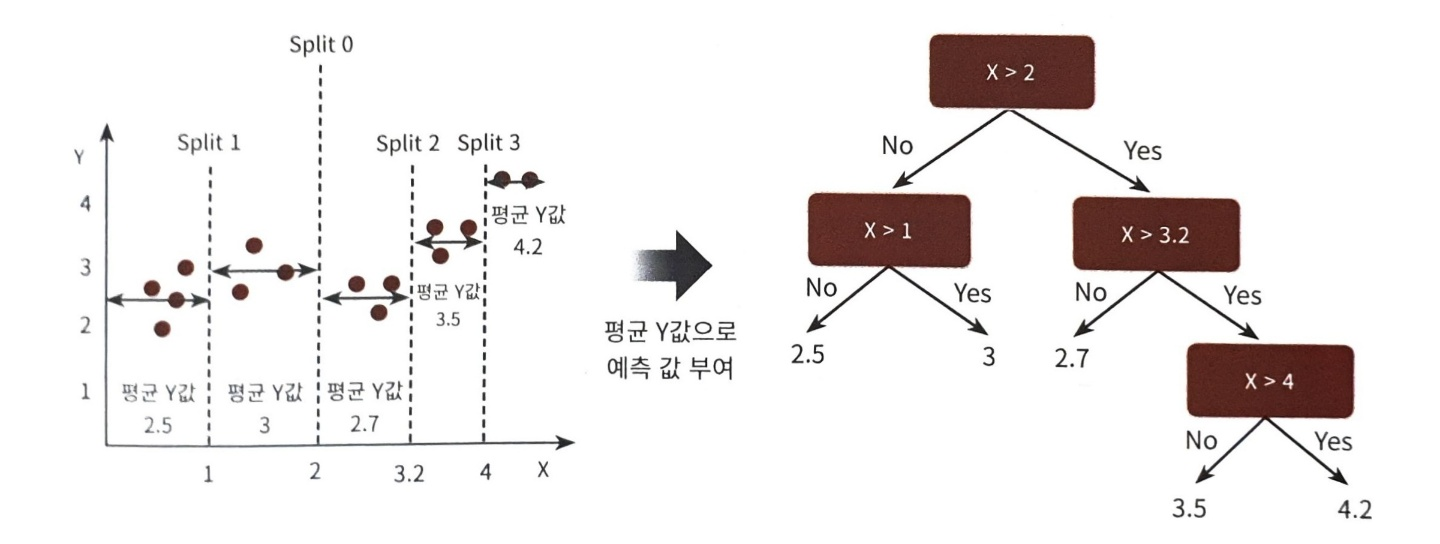

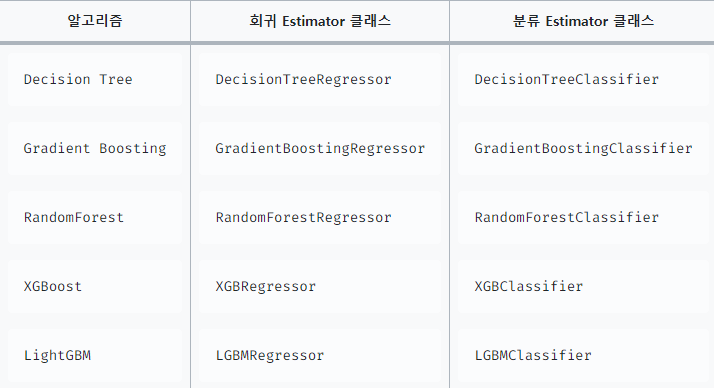

## 랜덤포레스트 회귀를 이용한 보스턴 집가격 예측 실습

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 MSE scores: ', np.round(-neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 MSE scores:  [ 7.88 13.14 20.57 46.23 18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


### feature importances

<AxesSubplot:>

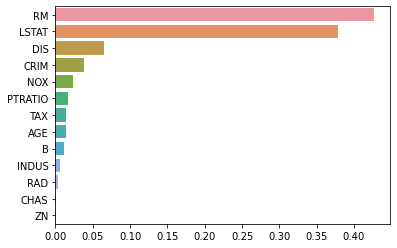

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data,y_target 데이터 셋을 적용하여 학습
rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

### 하이퍼 파라미터 튜닝 및 과적합 살펴보기
- 하이퍼 파라미터 중 하나인 ma_depth를 튜닝해본다
- 또한 과대적합과 과소적합에 대해서도 살펴본다
- 그래프로 살펴보기 위해서  RM 변수만을 사용한다

#### RM 변수와 PRICE(target)의 관계살펴보기

(100, 2)


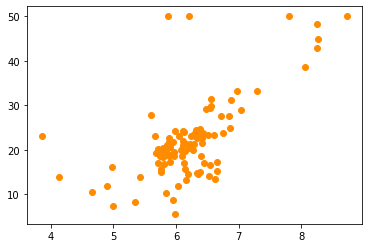

In [8]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0) # 시각화를 간편하게 보기위해 100개만 추출하여 살펴본다
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

#### 선형회귀와 회귀트리(max_depth=2,7)들 학습 및 비교

In [12]:
# linear regression도 함께 살펴본다
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개의 데이터 셋 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature=bostonDF_sample['RM'].values.reshape(-1,1) #feature를 벡터로 넣기 위해서 이러한 변환 필요
y_target =bostonDF_sample['PRICE']

#학습과 예측 수행
lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)

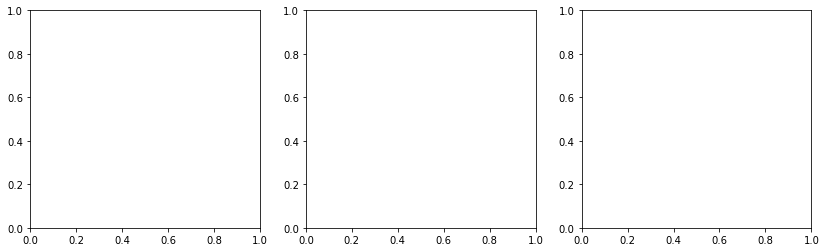

In [14]:
fig, (ax1,ax2,ax3)=plt.subplots(figsize=(14,4), ncols=3)

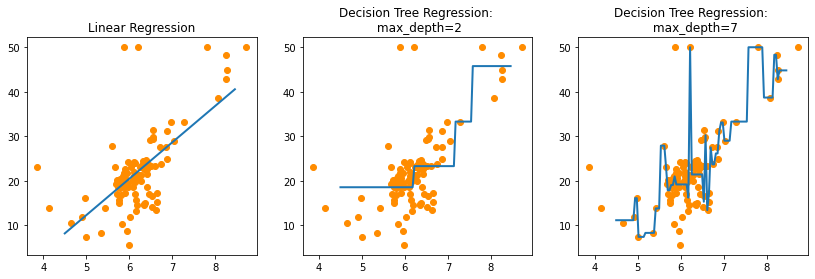

In [17]:
fig, (ax1,ax2,ax3)=plt.subplots(figsize=(14,4), ncols=3)

# X축 값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample['RM'],bostonDF_sample['PRICE'],c="darkorange")
ax1.plot(X_test,pred_lr,label="linear",linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample['RM'],bostonDF_sample['PRICE'],c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample['RM'],bostonDF_sample['PRICE'],c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

### LSTAT에 대해서 살펴보기

(100, 3)


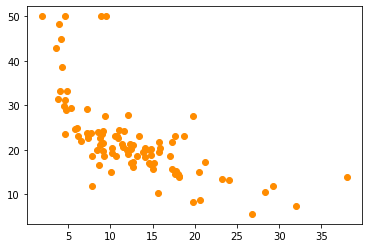

In [69]:
bostonDF_sample_lstat = bostonDF[['LSTAT','RM','PRICE']]
bostonDF_sample_lstat = bostonDF_sample_lstat.sample(n=100,random_state=0) # 시각화를 간편하게 보기위해 100개만 추출하여 살펴본다
print(bostonDF_sample_lstat.shape)
plt.figure()
plt.scatter(bostonDF_sample_lstat.LSTAT , bostonDF_sample_lstat.PRICE,c="darkorange")

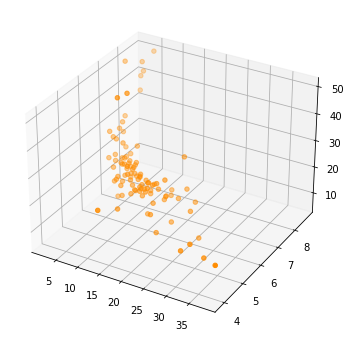

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(bostonDF_sample_lstat.LSTAT ,bostonDF_sample_lstat.RM, bostonDF_sample_lstat.PRICE,c="darkorange")

In [43]:
bostonDF_sample = bostonDF[['RM','LSTAT','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0) # 시각화를 간편하게 보기위해 100개만 추출하여 살펴본다


X_feature=bostonDF_sample[['RM','LSTAT']] #feature를 벡터로 넣기 위해서 이러한 변환 필요
y_target =bostonDF_sample['PRICE']

#학습과 예측 수행
lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)


DecisionTreeRegressor(max_depth=7)

,RM,LSTAT
0,4.50,34.7
1,4.54,34.4
2,4.58,34.1
3,4.62,33.8
4,4.66,33.5
...,...,...
95,8.30,6.2
96,8.34,5.9
97,8.38,5.6
98,8.42,5.3


In [62]:
pred_lr=lr_reg.predict(X_feature)
pred_rf2=rf_reg2.predict(X_feature)
pred_rf7=rf_reg7.predict(X_feature)

pred_lr_data=X_feature.copy()
pred_lr_data['pred']=pred_lr
pred_lr_data=pred_lr_data.sort_values(by="LSTAT",ascending=False)

pred_rf2_data=X_feature.copy()
pred_rf2_data['pred']=pred_rf2
pred_rf2_data=pred_rf2_data.sort_values(by="LSTAT",ascending=False)

pred_rf7_data=X_feature.copy()
pred_rf7_data['pred']=pred_rf7
pred_rf7_data=pred_rf7_data.sort_values(by="LSTAT",ascending=False)


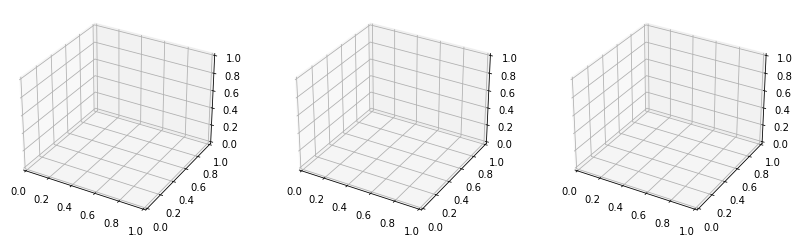

In [64]:
fig=plt.figure(figsize=(14,4))
ax1=fig.add_subplot(131,projection="3d")
ax2=fig.add_subplot(132,projection="3d")
ax3=fig.add_subplot(133,projection="3d")

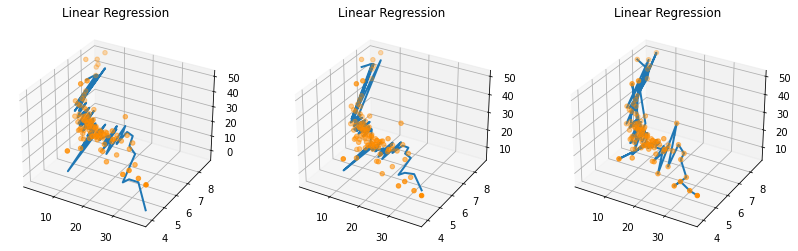

In [68]:
fig=plt.figure(figsize=(14,4))
ax1=fig.add_subplot(131,projection="3d")
ax2=fig.add_subplot(132,projection="3d")
ax3=fig.add_subplot(133,projection="3d")


# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample_lstat.LSTAT ,bostonDF_sample_lstat.RM, bostonDF_sample_lstat.PRICE,c="darkorange")
ax1.plot(pred_lr_data.LSTAT,pred_lr_data.RM,pred_lr_data.pred,label="linear",linewidth=2)

# 선형 회귀로 학습된 모델 회귀 예측선
ax2.set_title('Linear Regression')
ax2.scatter(bostonDF_sample_lstat.LSTAT ,bostonDF_sample_lstat.RM, bostonDF_sample_lstat.PRICE,c="darkorange")
ax2.plot(pred_rf2_data.LSTAT,pred_rf2_data.RM,pred_rf2_data.pred,label="linear",linewidth=2)

# 선형 회귀로 학습된 모델 회귀 예측선
ax3.set_title('Linear Regression')
ax3.scatter(bostonDF_sample_lstat.LSTAT ,bostonDF_sample_lstat.RM, bostonDF_sample_lstat.PRICE,c="darkorange")
ax3.plot(pred_rf7_data.LSTAT,pred_rf7_data.RM,pred_rf7_data.pred,label="linear",linewidth=2)

In [ ]:
# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample['RM'],bostonDF_sample['PRICE'],c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample['RM'],bostonDF_sample['PRICE'],c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)